## Linear Regression
A common experimental design calls for some independent variable (or predictor variable) of interval or ratio scale to be systematically varied and the resulting dependent variable (or outcome variable) to be measured. An analysis is then performed to see if there is a correlation between the two variables. Even when an experiment such as this is not carried out, a researcher may look for correlation between two variables without even if they have no good idea of which variable is the predictor and which is the outcome. In all of these situations, a T-test can be performed on the Pearson's correlation coefficient for the relationship between the variables. The null hypothesis is that there is no correlation between the two variables at the population level. 

After this notebook you will know:
* how to make scatter plots of data using python.
* how to fit scatter plots with lines of best fit.
* how to perform a T-test for &rho; (the population correlation coefficient) using r (the sample correlation coefficient). 

### The Data and Null Hypotheis

In this notebook a dataset will be explored to see if there is a coorelation between temperature and the requency of cricket chirps. 

Dataset Name: cricketchirps.csv

Title: Cricket Chirps vs. Temperature

Source: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

Description:

X = chirps/sec for the striped ground cricket

Y = temperature in degrees Fahrenheit

The null and alternative hypotheses are as follows:

* H<sub>0</sub>: There is no correlation between temperature and cricket chirp frequency.
* H<sub>A</sub>: Temperature and cricket chirp frequency are correlated.

The following cell will import the cricket chirps data into a pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # some useful stuff
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/cricketchirps.csv"
crickets = pd.read_csv(url)

In [2]:
print(crickets.shape)
crickets.head(5)

(15, 2)


,X chirps/sec,Y temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


### Temperature Versus Cricket Chirp Frequency

Can cricket chirp frequency predict temperature? Let's make a scatter plot and fit it with a line of best fit (linear regression) to explore the relationship between these two variables.

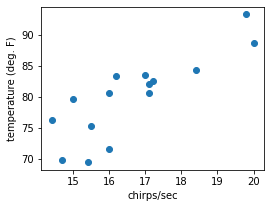

In [3]:
x = crickets['X chirps/sec']
y = crickets['Y temperature']
plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.xlabel('chirps/sec');
plt.ylabel('temperature (deg. F)')
plt.show()

### Linear Regression

Doing linear regression in Python is not too difficult but it does require some code that can be nebulous to a beginner. To make the process easier I've written a Python function that returns data to plot a line of best fit when you pass it the raw data used to make a scatterplot. 

In [4]:
# Groff's Linear Regression Function
# To use copy and paste this code into an empty cell in your notebook.
# Then, run that cell to gain access to the function
def linReg_Groff(xs, ys):
    from sklearn import linear_model
    regr = linear_model.LinearRegression()
    
    xs = np.array(xs)
    ys = np.array(ys)

    # fit the model
    xs = xs.reshape(-1,1) # need to reshape so there is only one column ...
    ys = ys.reshape(-1,1)
    regr.fit(xs,ys) # ... because this function can't handle pandas data well.

    # define limits for the line-of-best-fit
    x_fit = np.array([min(xs), max(xs)]).reshape(-1,1) # only need two points to make a line
    y_fit = regr.predict(x_fit)
    
    r_sq = regr.score(xs,ys)
    
    return x_fit, y_fit, r_sq

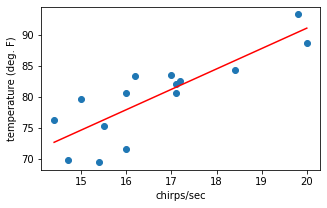

In [5]:
# Let's plot the data and apply the line-of-best-fit
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.xlabel('chirps/sec');
plt.ylabel('temperature (deg. F)')

x_fit, y_fit, r_sq = linReg_Groff(x,y)

plt.plot(x_fit, y_fit ,c='r') 
plt.savefig('fig1.png',dpi=300)
plt.show()

In [6]:
# The coefficent of determination, r^2, is calculated for us too
print('r^2:', r_sq)
# The Pearson's correlation coefficient is the squareroot of this
r = np.sqrt(r_sq)
print('r:', r)

r^2: 0.6974651450167398
r: 0.8351437870311554


### T-Test on Rho

Is this correlation coefficient statistically signification. To find out we do a T-test. Our hypotheses from above given as pure statistical statements are as follows.

* H<sub>0</sub>: &rho; = 0 at &alpha; = 0.05
* H<sub>A</sub>: &rho; not equal to 0. 

The test statistic for a t-test on rho is given by the following. 

t = (r sqrt(N-2))/sqrt(1 - r^2)

where

r is Pearson's correlation coefficient, N is the number of (x,y) pairs in the data sample, and there are N-2 degrees of freedom.

**What is the degrees of freedom and the t-critical value (two-tail) for the cricket data?**

df = N-2 = 15-2 = 13

t-critical = 2.16036866 

In [7]:
# now let's calculate the t-statistic based on r and N
N = len(x)
t = r*np.sqrt(N-2)/np.sqrt(1-r**2)
print('t =', t)

t = 5.474509607824955


In [8]:
# There is a built in python function for doing a t-test on the population correlation coefficient rho.
r, pvalue = stats.pearsonr(x,y)
print('r =', r, 'p-value = ',pvalue)

r = 0.8351437870311552 p-value =  0.00010667185499560143


### Intepreting the Result
Since the t-statistic is greater than t-critical we reject the null and accept the alternative hypothesis. There is a population level coorelation between cricket chirping frequency and temperature. 

There is a different test called ther Spearman R Test to look test for correlations between rank-order (ordinal at best) data. The python function for this test is called stats.spearmanr() and it is used exactly like stats.pearsonr(). One can also calculate 95% confidence intervals on the population coorelation coefficent from the sample r using a procedure called the Fisher r-to-z transformation. 